# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

## 1. Read in the file using pandas, and look at the first five rows

In [3]:
df = pd.read_excel('KyotoFullFlower7.xls')
df.head()

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [4]:
df.shape

(1240, 6)

In [5]:
df.dtypes

Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)    object
Unnamed: 1                                                                                                      object
Unnamed: 2                                                                                                      object
Unnamed: 3                                                                                                      object
Unnamed: 4                                                                                                      object
Unnamed: 5                                                                                                      object
dtype: object

In [6]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25)
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [7]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25)
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [8]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25, na_values= '-')
df.head(20)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN
5,806,NaN,NaN,NaN,NaN,NaN
6,807,NaN,NaN,NaN,NaN,NaN
7,808,NaN,NaN,NaN,NaN,NaN
8,809,NaN,NaN,NaN,NaN,NaN
9,810,NaN,NaN,NaN,NaN,NaN


## 5. What source is the most common as a reference?

In [9]:
df['Reference Name'].value_counts()

NEWS-PAPER(ARASHIYAMA)                    94
SUGIURAKE-NIKKI                           38
MYOHOIN-HINAMIKI                          32
OYUDONONO-UENO-NIKKI                      26
OYUDONONO-UENO-NIKKI [EDA]                21
DAIGOJI-ZATSUYO                           21
NIHONKIRYAKU                              19
SANETAKA-KOKI                             19
KAKUMEIKI                                 15
(SHIRYO-SORAN)                            15
ZOKU-SHIGUSHO                             14
INRYOGEN-NICHIROKU                        13
NISUIKI                                   13
MEIGETSUKI                                12
GUKANKI                                   10
GIENJUNKO-NIKKI(DAIGO)                    10
DAIGO-ZOJIKI                               9
MOTOHIRO-KOKI                              9
KANMON-GYOKI(FUSHIMI)                      9
KEIHAN RAILWAY ADV(ARASHIYAMA)             9
TOKITSUGU-KYOKI                            8
RAI-SANYO-NIPPU                            8
HANAZONOTE

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [10]:
df['Full-flowering date (DOY)']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11       92.0
12        NaN
13        NaN
14      105.0
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
1185    102.0
1186     95.0
1187    106.0
1188     93.0
1189     88.0
1190     97.0
1191     94.0
1192     97.0
1193     99.0
1194     99.0
1195    103.0
1196     97.0
1197     91.0
1198     94.0
1199    100.0
1200     96.0
1201     91.0
1202     98.0
1203     92.0
1204     99.0
1205     98.0
1206     97.0
1207     95.0
1208     95.0
1209     95.0
1210     99.0
1211    101.0
1212     93.0
1213     94.0
1214     93.0
Name: Full-flowering date (DOY), Length: 1215, dtype: float64

In [11]:
df['Full-flowering date (DOY)'].value_counts

<bound method IndexOpsMixin.value_counts of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11       92.0
12        NaN
13        NaN
14      105.0
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
1185    102.0
1186     95.0
1187    106.0
1188     93.0
1189     88.0
1190     97.0
1191     94.0
1192     97.0
1193     99.0
1194     99.0
1195    103.0
1196     97.0
1197     91.0
1198     94.0
1199    100.0
1200     96.0
1201     91.0
1202     98.0
1203     92.0
1204     99.0
1205     98.0
1206     97.0
1207     95.0
1208     95.0
1209     95.0
1210     99.0
1211    101.0
1212     93.0
1213     94.0
1214     93.0
Name: Full-flowering date (DOY), Length: 1215, dtype: float64>

In [12]:
df.isnull()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,False,True,True,True,True,True
1,False,True,True,True,True,True
2,False,True,True,True,True,True
3,False,True,True,True,True,True
4,False,True,True,True,True,True
5,False,True,True,True,True,True
6,False,True,True,True,True,True
7,False,True,True,True,True,True
8,False,True,True,True,True,True
9,False,True,True,True,True,True


In [13]:
df['Full-flowering date(DOY)'] = df['Full-flowering date (DOY)'].dropna(how='AnA')

## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f881a90>]],
      dtype=object)

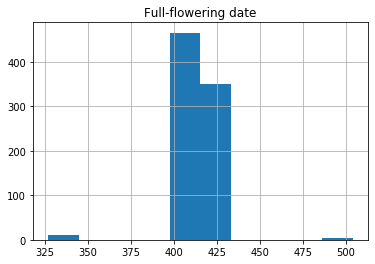

In [14]:
df.hist(column='Full-flowering date')

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f7a3da0>]],
      dtype=object)

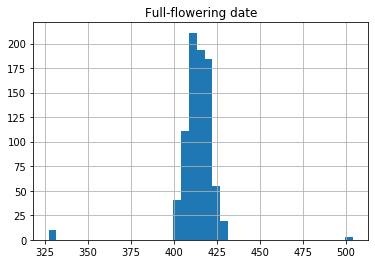

In [15]:
df.hist(column='Full-flowering date', bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [16]:
df['Full-flowering date'].describe()

count    827.000000
mean     413.717050
std       12.381731
min      327.000000
25%      410.000000
50%      414.000000
75%      419.000000
max      504.000000
Name: Full-flowering date, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [17]:
df[df.AD<1900]['Full-flowering date'].mean()

414.3893557422969

## 11. How about after 1900?

In [18]:
df[df.AD>1900]['Full-flowering date'].mean()

409.44642857142856

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [19]:
df[df['Data type code']==4].shape

(39, 7)

## 13. Show only the years where our data was from a title in Japanese poetry

## 14. Graph the full-flowering date (DOY) over time

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

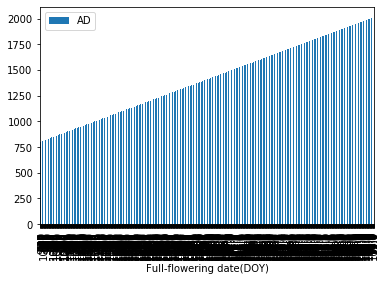

In [21]:
df.plot(kind='bar',x='Full-flowering date(DOY)',y='AD')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [22]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

In [23]:
rolling_date = df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()
rolling_date

1210    96.45
1211    96.80
1212    96.60
1213    96.35
1214    96.05
Name: Full-flowering date (DOY), dtype: float64

In [24]:
# trying to plot -->

df.plot(kind='bar', x='AD', y='rolling_date', ylim=(80, 120))

#Here it doesn't work, dunno why

KeyError: 'rolling_date'

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [ ]:
month = df.loc[df['Full-flowering date'] < 500, 'month'] = 'April'

In [ ]:
month = df.loc[df['Full-flowering date'] <400, 'month'] = 'March'

In [ ]:
month = df.loc[df['Full-flowering date'] <600, 'month'] = 'May'

### 17. Using your new column, how many blossomings happened in each month?

In [ ]:
df.month[400:700].describe()

#not sure if that's how it should be done.

### 18. Graph how many blossomings happened in each month.

In [ ]:
df.hist(column='month'[400:700], bins=50)

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [ ]:
df['Full-flowering date'].dropna().astype(int).head()

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [ ]:
df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[0] + "!!!").head()

In [ ]:
df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[0] + value[2:4]).head()

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [ ]:
df.['day-of-month'] = df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[0] + value[2:4]).head()

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

# YOU ARE DONE.

And **incredible.**